# Tarea 1 de Probabilidad y Estadística

In [1766]:
print ('Hola Mundo!')

Hola Mundo!


# Lectura de Datos

Aqui se importan los datos del CSV

In [1767]:
import os
import pandas as pd

path = os.path.join('./AirQualityUCI.csv')
data = pd.read_csv(path, delimiter=';',parse_dates=[['Date', 'Time']])
data['Date_Time'] = [x.replace('.', ':') for x in data['Date_Time']] 

data

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004 18:00:00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,10/3/2004 19:00:00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,10/3/2004 20:00:00,"2,2",1402,88,9,939,131,1140,114,1555,1074,"11,9",54,"0,7502"
3,10/3/2004 21:00:00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,11,60,"0,7867"
4,10/3/2004 22:00:00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005 10:00:00,"3,1",1314,-200,"13,5",1101,472,539,190,1374,1729,"21,9","29,3","0,7568"
9353,4/4/2005 11:00:00,"2,4",1163,-200,"11,4",1027,353,604,179,1264,1269,"24,3","23,7","0,7119"
9354,4/4/2005 12:00:00,"2,4",1142,-200,"12,4",1063,293,603,175,1241,1092,"26,9","18,3","0,6406"
9355,4/4/2005 13:00:00,"2,1",1003,-200,"9,5",961,235,702,156,1041,770,"28,3","13,5","0,5139"


## Filtro

In [1768]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

data = data[['Date_Time' ,'PT08.S2(NMHC)']]
data = data[data['PT08.S2(NMHC)'].notnull()]
data = data[data['PT08.S2(NMHC)'] != -200]
data['Date_Time'] = pd.to_datetime(data['Date_Time'])
data = data.sort_values(by=['Date_Time'])

data

,Date_Time,PT08.S2(NMHC)
510,2004-01-04 00:00:00,825
511,2004-01-04 01:00:00,770
512,2004-01-04 02:00:00,716
513,2004-01-04 03:00:00,713
514,2004-01-04 04:00:00,615
...,...,...
8809,2005-12-03 19:00:00,878
8810,2005-12-03 20:00:00,1119
8811,2005-12-03 21:00:00,1064
8812,2005-12-03 22:00:00,803


# Obtener datos de la variable

In [1769]:
import numpy as np
Variable = np.sort(data['PT08.S2(NMHC)'].to_numpy()) # Convierte el dataframe a numpy array y lo ordena

# Mediana

In [1770]:
median = np.median(Variable) # Calculo de la mediana de los datos
print(median)

909.0


# Media

In [1771]:
promedio = np.mean(Variable) # Calculo del promedio de los datos
print(promedio)

939.1533755978201


# Moda

In [1772]:
import statistics as stat
moda = stat.mode(Variable) # Calcula la moda de los datos
print(moda)

853


# Calculo de los Cuartiles
1. Ordenamiento de Datos
2. Se consigue el largo del Arreglo
3. 

In [1773]:
import math

pt = data['PT08.S2(NMHC)'].sort_values().values

large = len(pt)
print(large)

position_1 = math.ceil(large/4)
position_3 = math.ceil(3 * large/4)

Q1 = pt[position_1]
Q2 = median
Q3 = pt[position_3]

print("Q1: ", Q1)
print("Q2: ", Q2)
print("Q3: ", Q3)

8991
Q1:  735
Q2:  909.0
Q3:  1116


# Rango Intercuartilico Muestral

In [1774]:
RIC = Q3 - Q1
print(RIC)

381


# Diagrama de Cajas

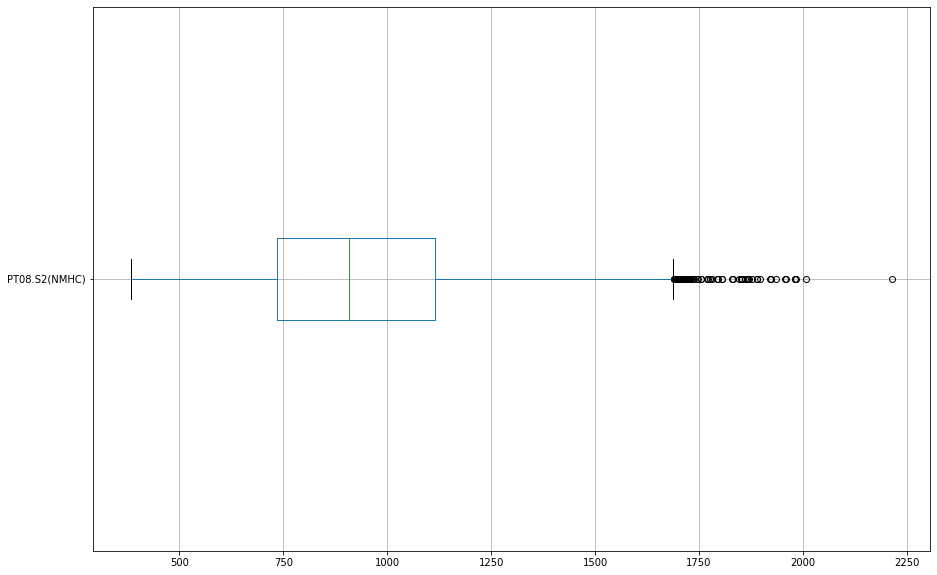

In [1775]:
import matplotlib.pyplot as plt

data.boxplot(column='PT08.S2(NMHC)',vert=False, figsize=(15,10))
plt.show()

In [1776]:
# Valores fuera de los rangos
print(1.5 * RIC + RIC + Q1)
anormal = data[data['PT08.S2(NMHC)'] > (1.5 * RIC + RIC + Q1)]
print(len(anormal))

percentage = len(anormal)/large * 100

print(percentage)

anormal

1687.5
66
0.7340674007340674


,Date_Time,PT08.S2(NMHC)
5684,2004-02-11 14:00:00,1727
5687,2004-02-11 17:00:00,1728
5688,2004-02-11 18:00:00,1853
5689,2004-02-11 19:00:00,1869
5690,2004-02-11 20:00:00,1935
...,...,...
6913,2004-12-23 19:00:00,1689
6914,2004-12-23 20:00:00,1692
7512,2005-01-17 18:00:00,1831
7513,2005-01-17 19:00:00,1712


# Titania vs Tiempo

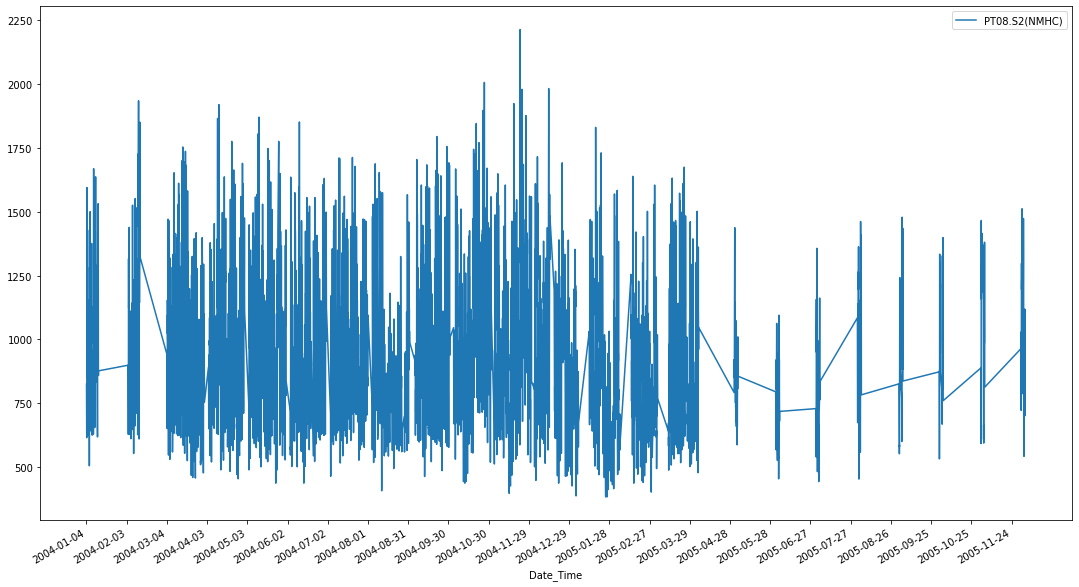

In [1777]:
# Histograma temporales, Agrupación temporal...

import numpy as np

ts = data
ts.index = data['Date_Time']
ts = ts[['PT08.S2(NMHC)']]

ts.cumsum()

ts.plot()

plt.gcf().set_size_inches(18.5, 10.5)
x = ts.index.values
plt.xticks(np.arange(min(x), max(x)+1, np.timedelta64(30,'D')))
plt.show()

# Varianza


In [1778]:
varianza = np.var(Variable) # Calculo de la varianza de los datos
print(varianza)


71191.09236959745


# Desviación estándar



In [1779]:
desviacion = np.std(Variable) # Calculo de la desviación estándar de los datos
print(desviacion)

266.8165893822898


# Rango muestral

In [1780]:
maximo=np.amax(Variable)
minimo=np.amin(Variable)
rangoMuestral=maximo-minimo
print(rangoMuestral)

1831


# Puntos 

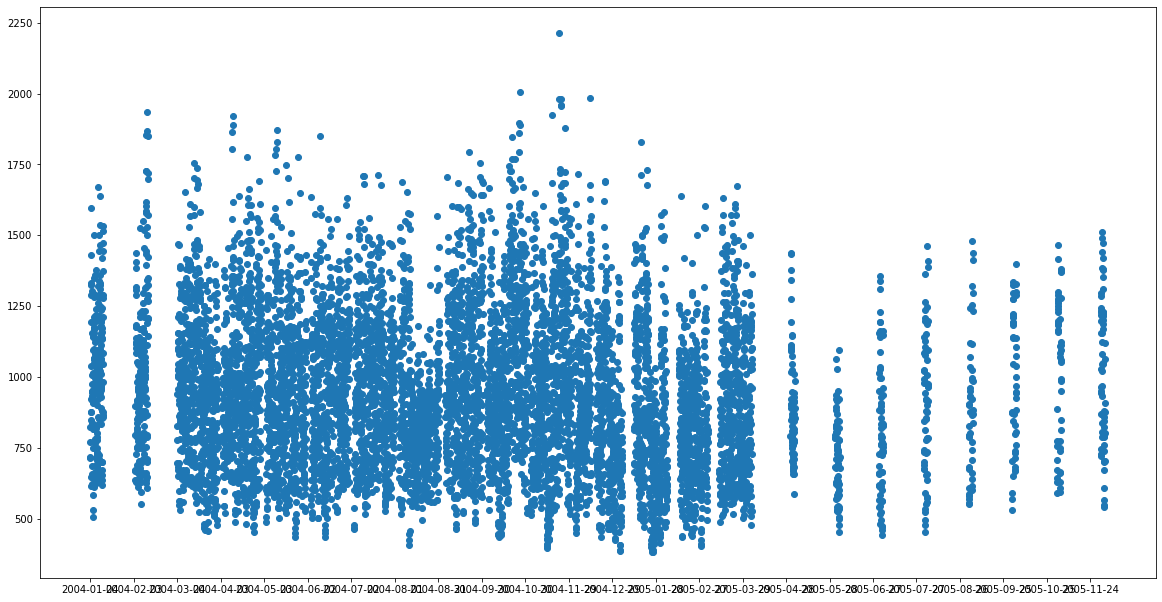

In [1781]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x =ts.index, y = ts)
plt.gcf().set_size_inches(20, 10.5)
x = ts.index.values
plt.xticks(np.arange(min(x), max(x)+1, np.timedelta64(30,'D')))
plt.xlabel("Fecha de medicion")
plt.ylabel("PT08.S2(NMHC)")
plt.show()



#REVISAR LOS EJES#


# Histograma

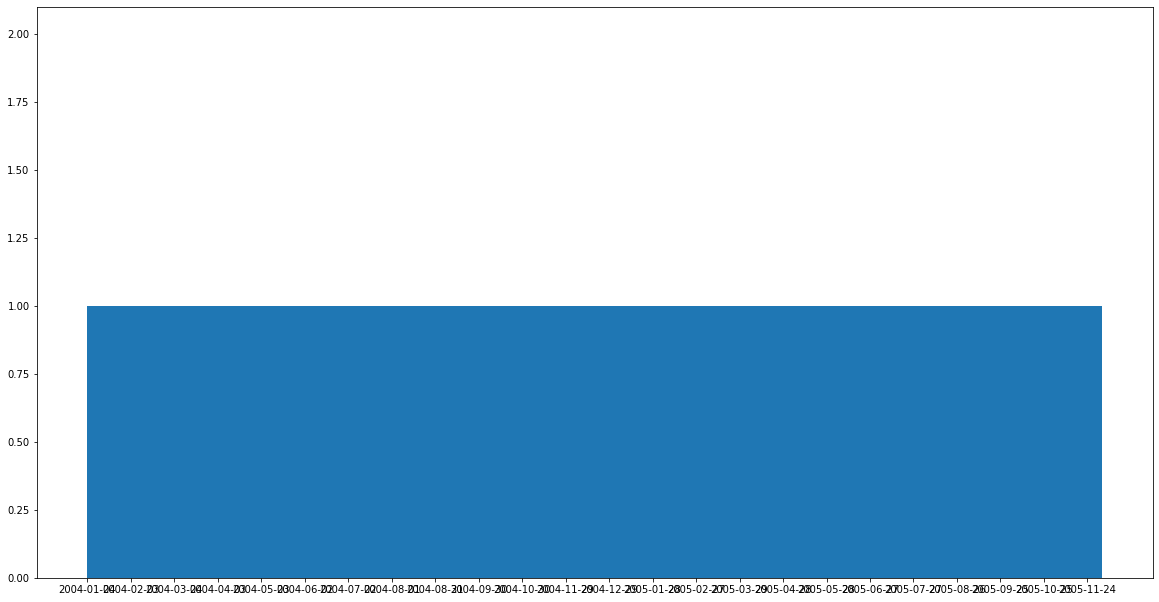

In [1782]:
# Crear la figura y los ejes
intervalos = math.ceil(math.sqrt(Variable.size))
plt.hist(x = Variable, bins = intervalos)
plt.title("Histograma de PTS08.S2(NMC)")
plt.xlabel("Intervalo")
plt.ylabel("Frecuencia")
plt.show()
